In [ ]:
#Libraries and data loading
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression


# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#importing the dataset and exploring it
from google.colab import files
uploaded = files.upload()

Saving Impact of COVID-19 on Mental Health (Responses) (1).xlsx to Impact of COVID-19 on Mental Health (Responses) (1).xlsx


In [ ]:
df = pd.read_excel('Impact of COVID-19 on Mental Health (Responses) (1).xlsx')
df

,Age,Gender,Income,Family Members,Employment Status,Employed/Self-Employed,Diagnosis,current state of mental health.,scared are you of being infected,personal space at home,irregular sleep cycle,Therapy,would you like to take therapy,How do you cope with stress or anxiety?,quarantine/ complete self-isolation,news from :-,Between March to May,Between June to September,Between October to December,Social distancing in your house\t\t\t\t\t\t\t\t\t\t,Financial situation at home\t\t\t\t\t\t\t\t\t,Government policies regarding COVID\t\t\t\t\t\t\t,Work pressure\t\t\t\t\t\t\t,Fake news,Stress [Between March to May],Anxiety [Between March to May],Loneliness [Between March to May],Happiness\t[Between March to May],Fatigue [Between March to May],Stress\t[Between June to September],Anxiety [Between June to September],Loneliness [Between June to September],Happiness [Between June to September],Fatigue [Between June to September],Anxiety [Between October to December],Stress [Between October to December],Loneliness [Between October to December],Happiness [Between October to December],Fatigue [Between October to December]
0,50-57,1,3,3,1,2,1,4,5,1,2,2,2.0,"1,2,3,4 5",2,"1, 3, 5",3,3.0,2,3,4,3,4,4,4,4,2,2,4,4,4,2,3,4,3,4,2,3,4
1,18-25,1,2,2,3,0,7,3,2,1,1,1,1.0,134 5,2,"1, 4",4,3.0,2,2,3,3,1,4,4,4,5,2,3,5,4,4,1,4,3,3,2,3,3
2,26-33,2,3,2,2,0,7,2,5,1,1,2,NaN,24,1,"1, 3, 4, 5",1,1.0,1,1,3,5,5,5,5,5,5,2,4,5,5,5,2,5,4,4,2,5,2
3,18-25,1,2,2,1,1,7,5,1,1,2,2,2.0,2,2,"2, 3",1,2.0,2,1,3,5,4,5,3,3,5,3,3,1,2,2,3,2,2,2,1,5,2
4,50-57,2,2,2,2,0,7,3,3,1,2,2,2.0,"1,2,3,5",2,"1, 2, 3, 5",1,1.0,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,42-49,2,3,3,1,2,"2, 5, 6",3,2,2,2,3,3.0,"2,5",1,"3, 4",3,1.0,2,4,3,3,2,5,2,4,2,4,2,4,2,3,3,3,2,4,2,5,2
146,34-41,1,3,3,2,0,3,3,4,2,2,3,3.0,3,1,3,4,4.0,2,4,5,3,3,3,4,4,2,4,4,2,4,3,3,3,3,4,3,2,4
147,34-41,2,3,3,2,2,4,4,4,2,2,1,2.0,4,1,1,3,3.0,1,4,3,3,4,4,3,2,4,3,3,4,2,4,2,3,3,2,4,2,3
148,26-33,2,3,3,1,2,"1, 4",3,3,1,1,3,3.0,2,2,"2, 3",2,3.0,2,4,2,5,2,4,2,4,2,4,2,4,2,4,3,2,3,3,2,3,2


In [ ]:
#Pandas: whats the data row count?
print(df.shape)

(150, 39)


In [ ]:
#Pandas: whats the distribution of the data?
print(df.describe())

           Gender  ...  Fatigue [Between October to December]  
count  150.000000  ...                               150.000000
mean     1.526667  ...                                 2.700000
std      0.514184  ...                                 1.079087
min      1.000000  ...                                 1.000000
25%      1.000000  ...                                 2.000000
50%      2.000000  ...                                 3.000000
75%      2.000000  ...                                 3.750000
max      3.000000  ...                                 5.000000

[8 rows x 35 columns]


In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                                                    Total   Percent
would you like to take therapy                          4  0.026667
Between June to September                               3  0.020000
 personal space at home                                 0  0.000000
Between March to May                                    0  0.000000
news from :-                                            0  0.000000
 quarantine/ complete self-isolation                    0  0.000000
 How do you cope with stress or anxiety?                0  0.000000
Therapy                                                 0  0.000000
 irregular sleep cycle                                  0  0.000000
Fatigue [Between October to December]                   0  0.000000
Between October to December                             0  0.000000
 current state of mental health.                        0  0.000000
 Diagnosis                                              0  0.000000
Employed/Self-Employed                          

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


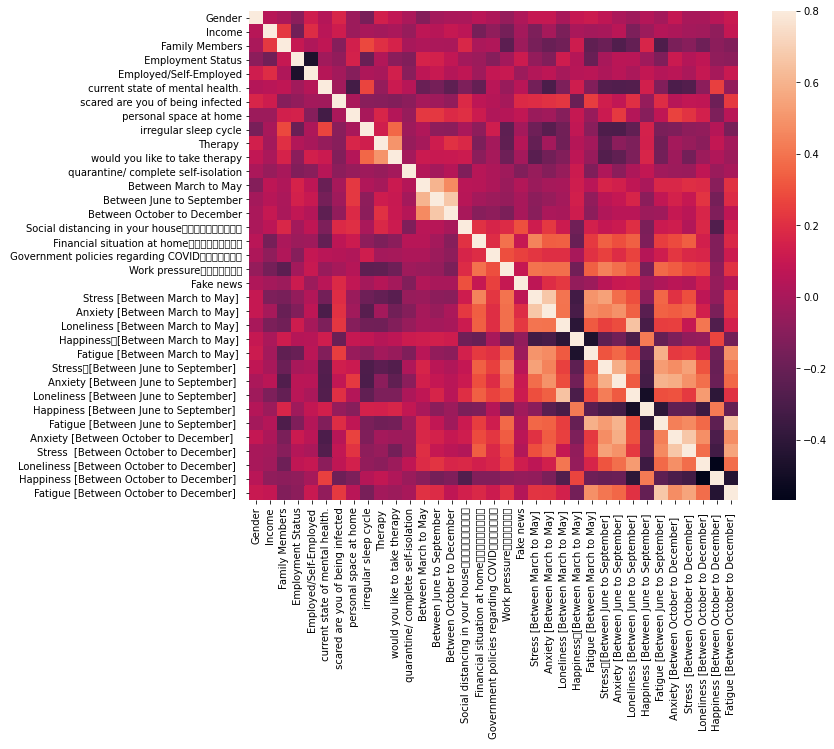

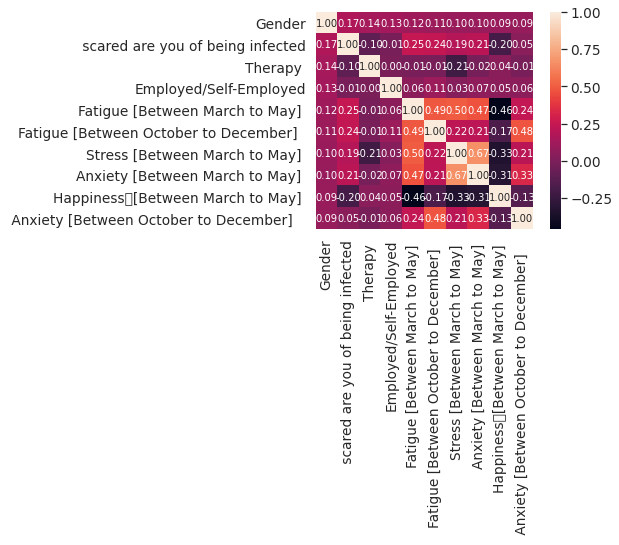

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Gender')['Gender'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


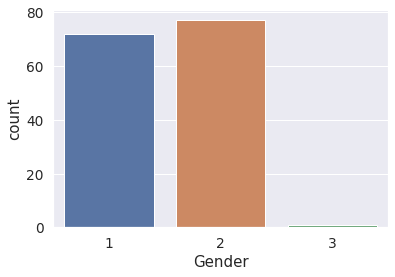

In [ ]:
sns.countplot('Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

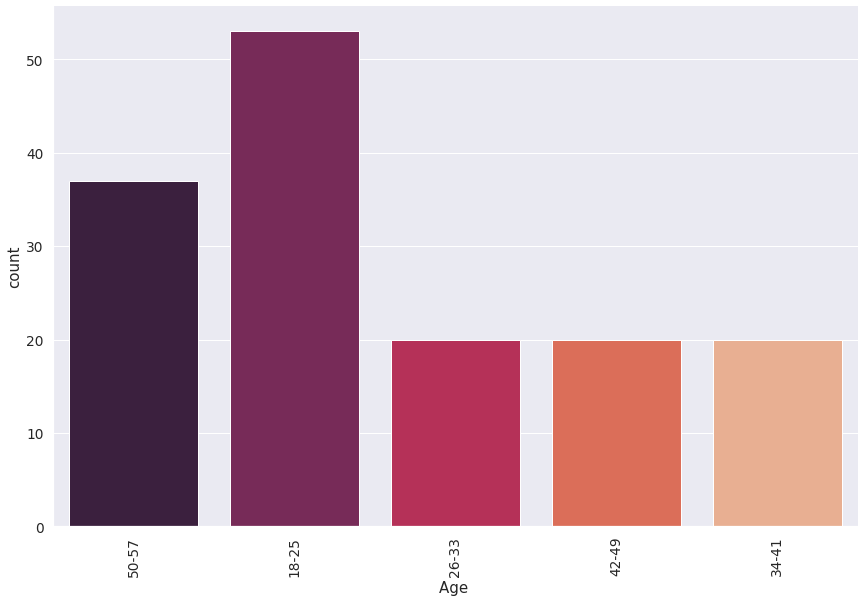

In [ ]:
#Quantities ordered by each state
sns.catplot('Age ',kind='count',data=df,palette='rocket',height=8,aspect=1.5)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


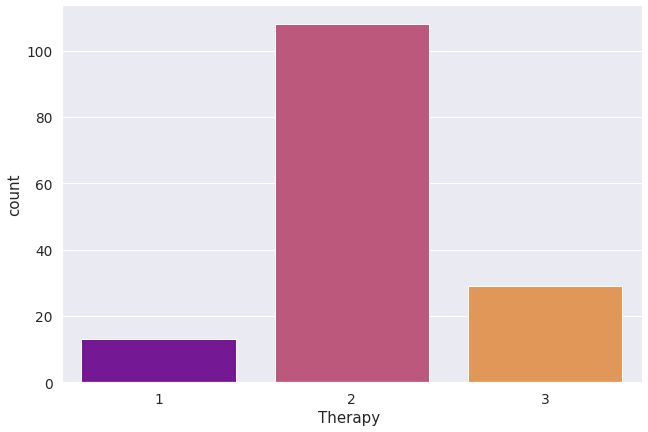

In [ ]:
#shipping modes of each segment
sns.catplot('Therapy ',data=df,kind='count',palette='plasma',aspect=1.5,height=6)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


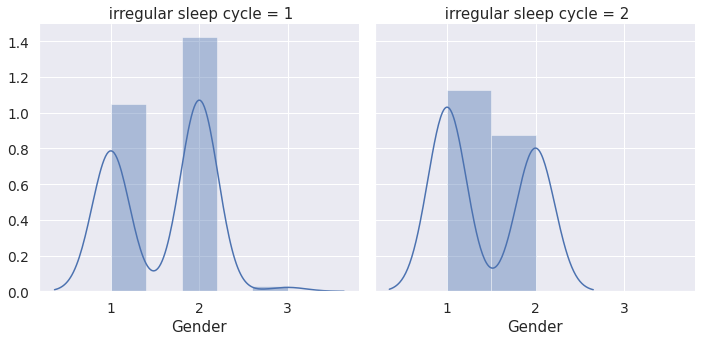

In [ ]:
g = sns.FacetGrid(df, col=' irregular sleep cycle', size=5)
g = g.map(sns.distplot, "Gender")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


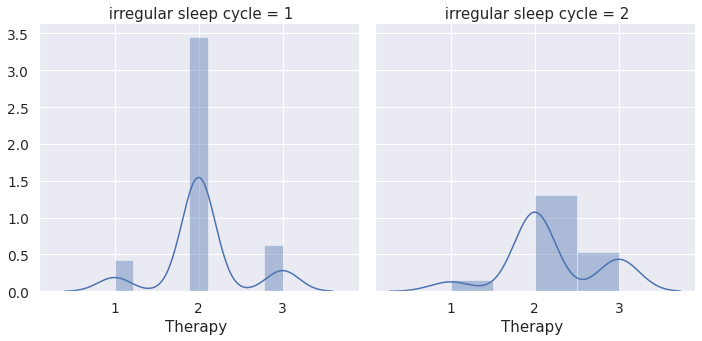

In [ ]:
g = sns.FacetGrid(df, col=' irregular sleep cycle', size=5)
g = g.map(sns.distplot, "Therapy ")

Stress

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Stress [Between March to May] ')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


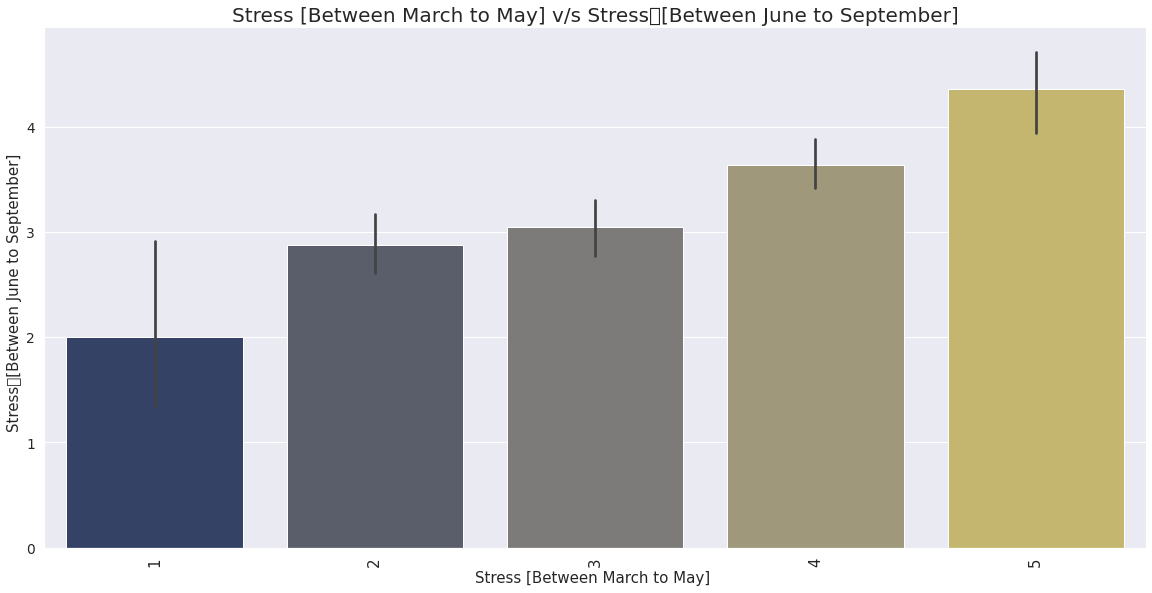

In [ ]:
sns.catplot('Stress [Between March to May] ','Stress	[Between June to September]  ',data=df,kind='bar',height=8,aspect=2,palette='cividis')
plt.xticks(size=15,rotation=90)
plt.title('Stress [Between March to May] v/s Stress	[Between June to September]',size=20)
plt.ylabel('Stress	[Between June to September]  ',size=15)
plt.xlabel('Stress [Between March to May] ',size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Stress\t[Between June to September]')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


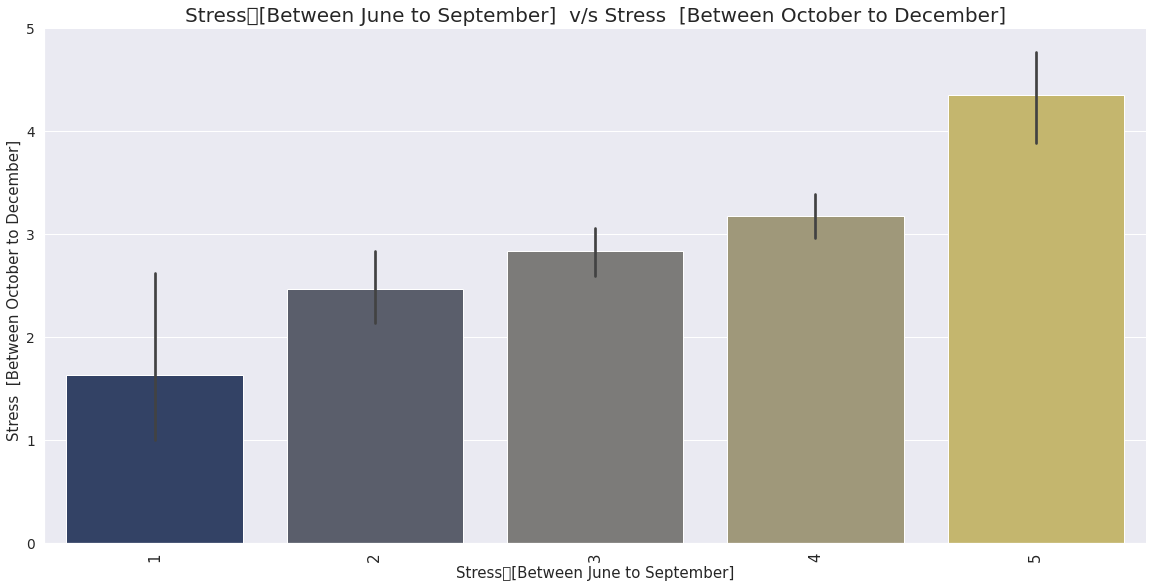

In [ ]:
sns.catplot('Stress	[Between June to September]  ','Stress  [Between October to December]  ',data=df,kind='bar',height=8,aspect=2,palette='cividis')
plt.xticks(size=15,rotation=90)
plt.title('Stress	[Between June to September]  v/s Stress  [Between October to December]',size=20)
plt.ylabel('Stress  [Between October to December]  ',size=15)
plt.xlabel('Stress	[Between June to September]',size=15)

Anxiety

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Between March to May')

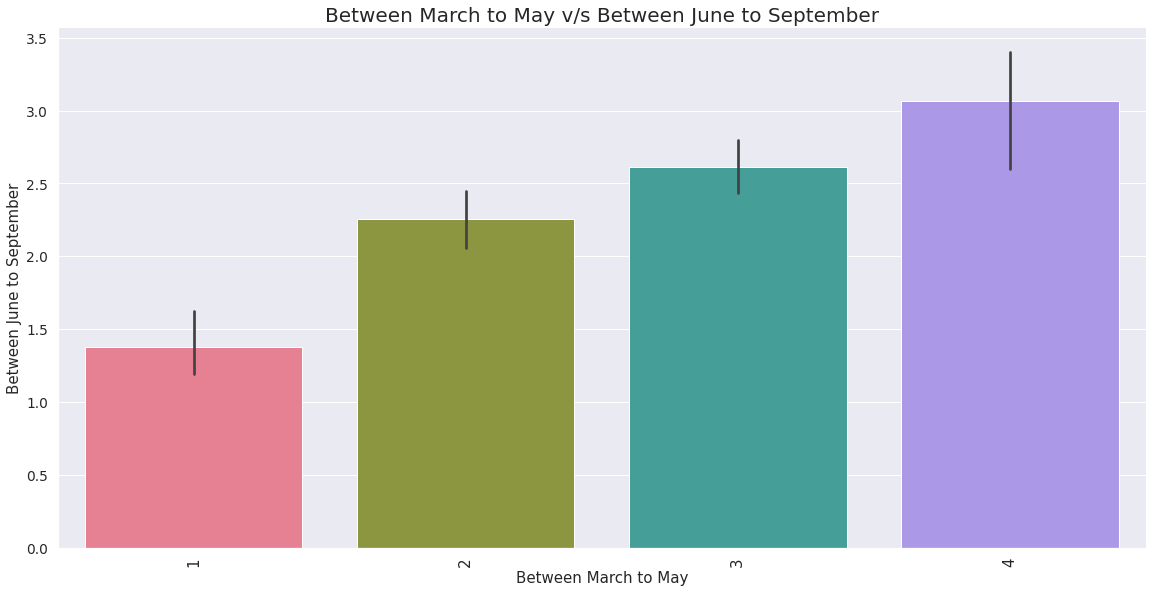

In [ ]:
sns.catplot('Between March to May','Between June to September',data=df,kind='bar',height=8,aspect=2,palette='husl')
plt.xticks(size=15,rotation=90)
plt.title('Between March to May v/s Between June to September',size=20)
plt.ylabel('Between June to September',size=15)
plt.xlabel('Between March to May',size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Between June to September')

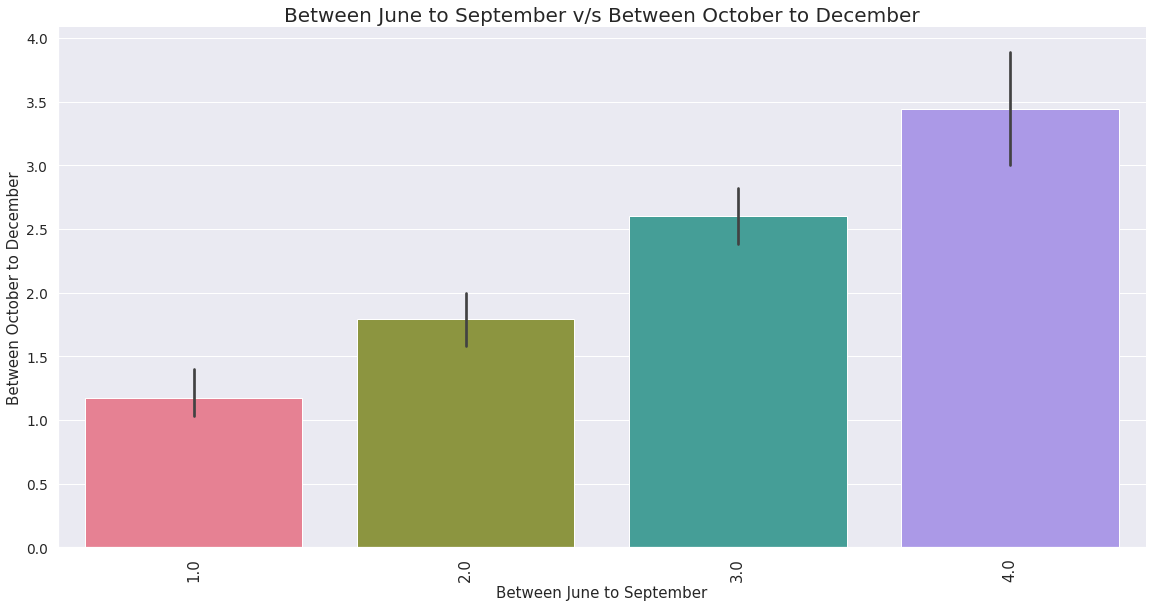

In [ ]:
sns.catplot('Between June to September','Between October to December',data=df,kind='bar',height=8,aspect=2,palette='husl')
plt.xticks(size=15,rotation=90)
plt.title('Between June to September v/s Between October to December',size=20)
plt.ylabel('Between October to December',size=15)
plt.xlabel('Between June to September',size=15)

Fatigue

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Fatigue [Between March to May] ')

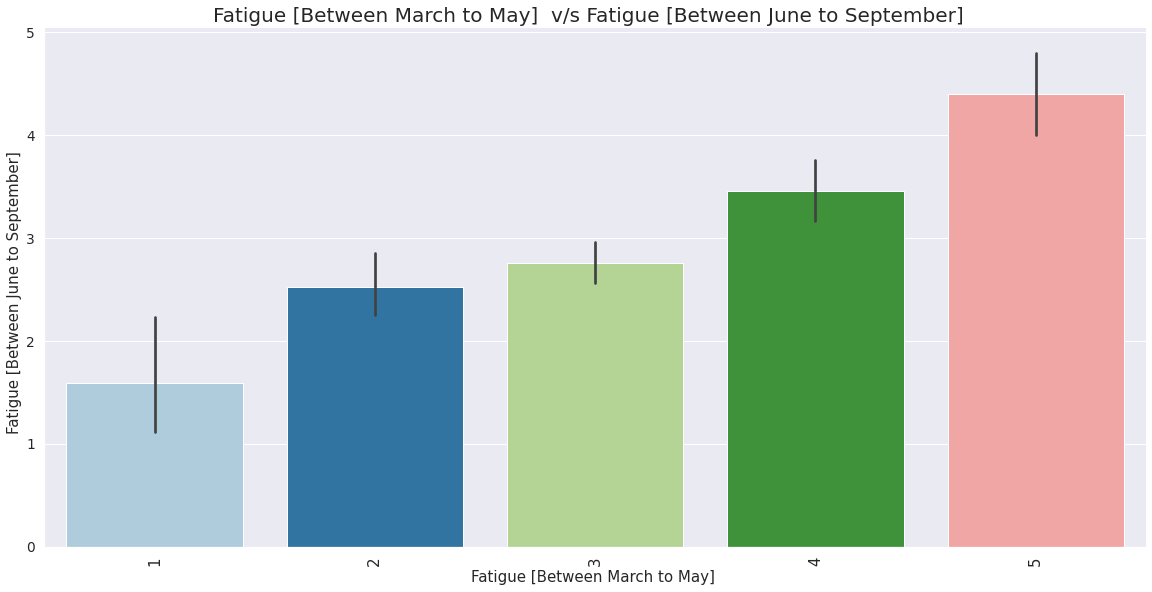

In [ ]:
sns.catplot('Fatigue [Between March to May] ','Fatigue [Between June to September]  ',data=df,kind='bar',height=8,aspect=2,palette='Paired')
plt.xticks(size=15,rotation=90)
plt.title('Fatigue [Between March to May]  v/s Fatigue [Between June to September]  ',size=20)
plt.ylabel('Fatigue [Between June to September]  ',size=15)
plt.xlabel('Fatigue [Between March to May] ',size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Fatigue [Between June to September]  ')

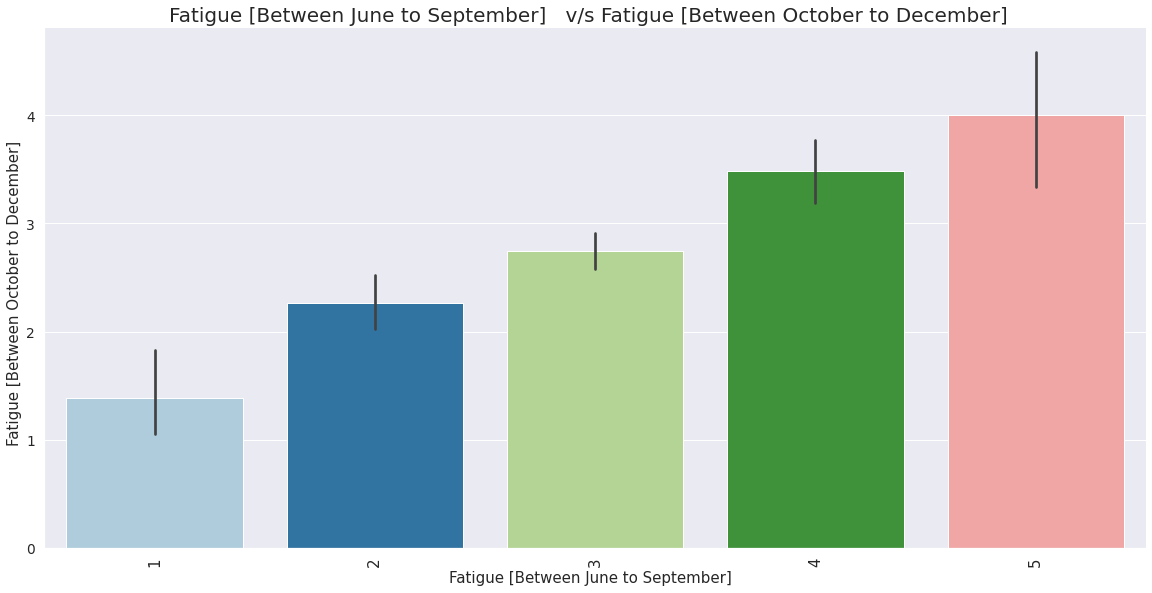

In [ ]:
sns.catplot('Fatigue [Between June to September]  ','Fatigue [Between October to December]  ',data=df,kind='bar',height=8,aspect=2,palette='Paired')
plt.xticks(size=15,rotation=90)
plt.title('Fatigue [Between June to September]   v/s Fatigue [Between October to December]  ',size=20)
plt.ylabel('Fatigue [Between October to December]  ',size=15)
plt.xlabel('Fatigue [Between June to September]  ',size=15)

Happiness

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Happiness\t[Between March to May] ')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


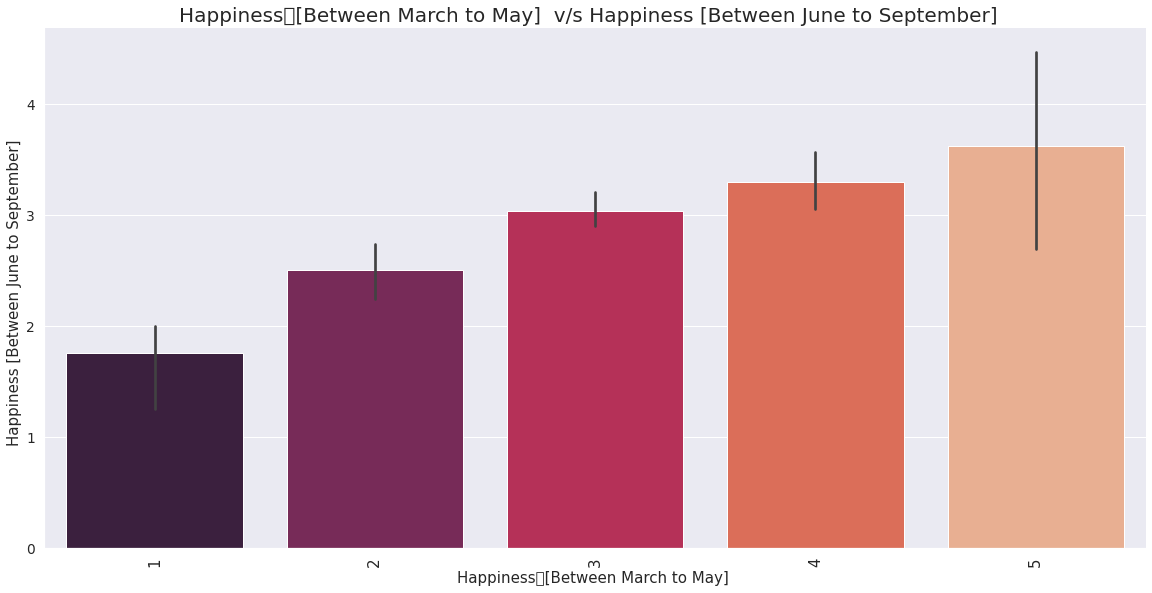

In [ ]:
sns.catplot('Happiness	[Between March to May] ','Happiness [Between June to September]  ',data=df,kind='bar',height=8,aspect=2,palette='rocket')
plt.xticks(size=15,rotation=90)
plt.title('Happiness	[Between March to May]  v/s Happiness [Between June to September]  ',size=20)
plt.ylabel('Happiness [Between June to September]  ',size=15)
plt.xlabel('Happiness	[Between March to May] ',size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Happiness [Between June to September]  ')

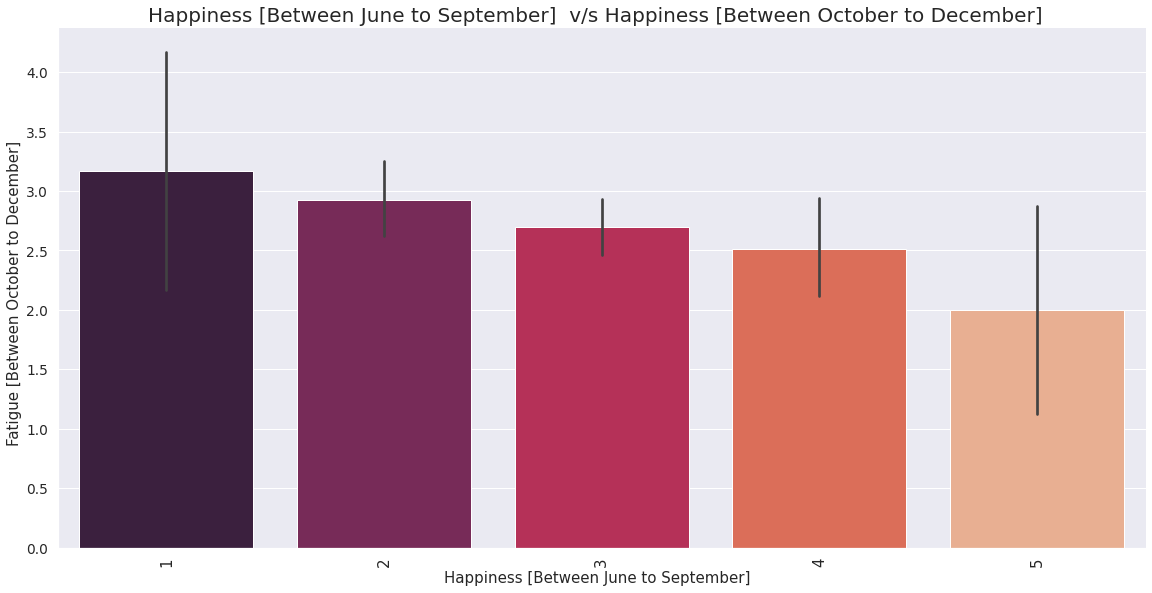

In [ ]:
sns.catplot('Happiness [Between June to September]  ','Fatigue [Between October to December]  ',data=df,kind='bar',height=8,aspect=2,palette='rocket')
plt.xticks(size=15,rotation=90)
plt.title('Happiness [Between June to September]  v/s Happiness [Between October to December]  ',size=20)
plt.ylabel('Fatigue [Between October to December]  ',size=15)
plt.xlabel('Happiness [Between June to September]  ',size=15)

Loneliness

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Loneliness [Between June to September]  ')

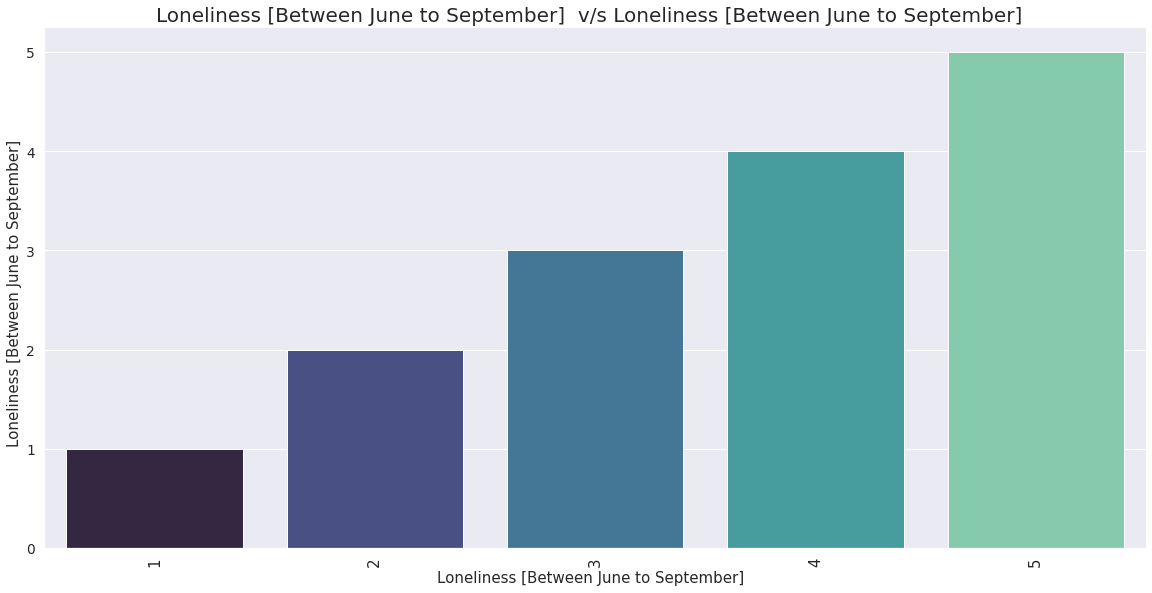

In [ ]:
sns.catplot('Loneliness [Between June to September]  ','Loneliness [Between June to September]  ',data=df,kind='bar',height=8,aspect=2,palette='mako')
plt.xticks(size=15,rotation=90)
plt.title('Loneliness [Between June to September]  v/s Loneliness [Between June to September]  ',size=20)
plt.ylabel('Loneliness [Between June to September]  ',size=15)
plt.xlabel('Loneliness [Between June to September]  ',size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 12.200000000000003, 'Happiness [Between June to September]  ')

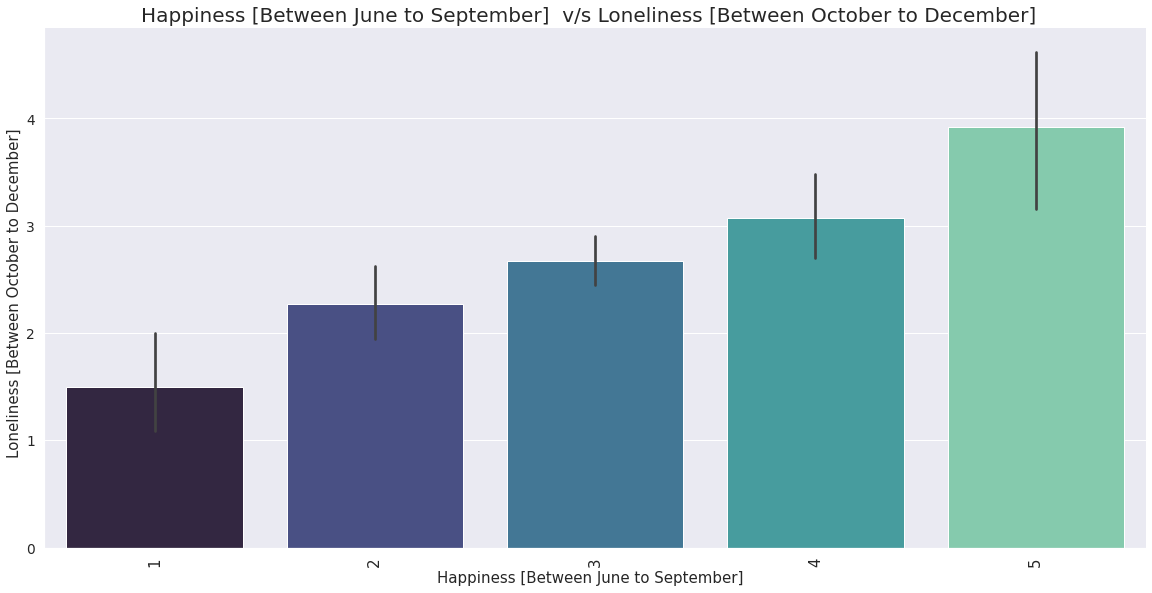

In [ ]:
sns.catplot('Loneliness [Between June to September]  ','Loneliness [Between October to December]  ',data=df,kind='bar',height=8,aspect=2,palette='mako')
plt.xticks(size=15,rotation=90)
plt.title('Happiness [Between June to September]  v/s Loneliness [Between October to December]  ',size=20)
plt.ylabel('Loneliness [Between October to December]  ',size=15)
plt.xlabel('Happiness [Between June to September]  ',size=15)

Text(0.5, 1.0, 'Employment Status during lockdown')

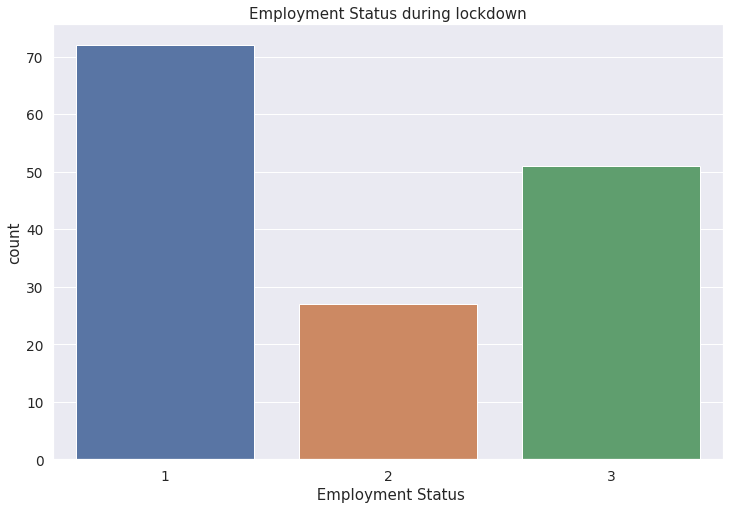

In [ ]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
g = sns.countplot(x=" Employment Status", data=df)
plt.title('Employment Status during lockdown')

Text(0.5, 1.0, 'Diagnosis during Lockdown')

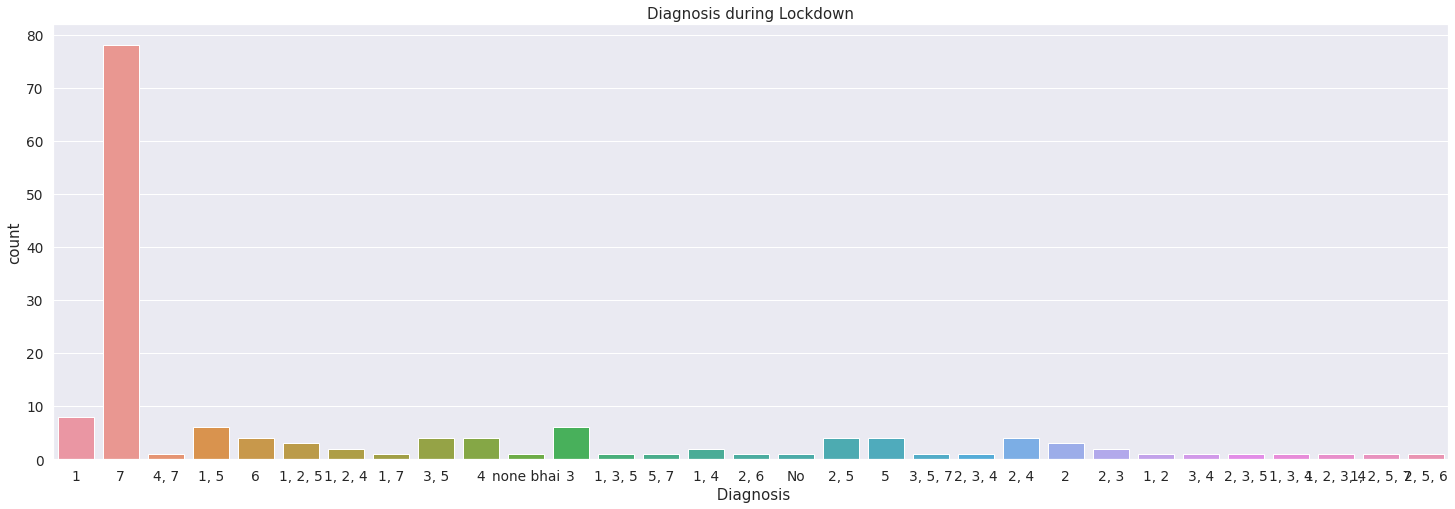

In [ ]:
# Let see how many people has been treated
plt.figure(figsize=(25,8))
g = sns.countplot(x=" Diagnosis", data=df)
plt.title('Diagnosis during Lockdown')